In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.gridspec import GridSpec
import linmix
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import mplpresets
import plotfunctions

In [3]:
fullcleardf = pd.read_csv('data/fullcleardf.csv')
sortedclearmergedf = pd.read_csv('data/sortedclearmergedf.csv')
barrodf =  pd.read_csv('data/barrodf.csv')
barromiddf =  pd.read_csv('data/barromiddf.csv')

limitdf = pd.read_csv('data/limitdf.csv')
limitbetanegdf = pd.read_csv('data/limitbetanegdf.csv')
limitpabdcdf = pd.read_csv('data/limitpabdcdf_avcor_csv.csv')
dclimitdf = pd.read_csv('data/dclimitdf.csv')
dclimitbetanegdf = pd.read_csv('data/dclimitbetanegdf.csv')


sortedpabdf = pd.read_csv('data/sortedpabdf.csv')
fullmergedf = pd.read_csv('data/fullmergePAB.csv')
fullmergebaddf = pd.read_csv('data/fullmergebadPAB.csv')
samplepabdcdf = pd.read_csv('data/samplepabdcdf_avcor.csv')

dustdf = pd.read_csv('data/dustdfPAB.csv')
dustcurvesdf = pd.read_csv('data/dustcurvesdf.csv')
attdf = pd.read_csv('data/attdfPAB.csv')

dcmergedf = pd.read_csv('data/dcmergePAB.csv')
dcsampledf = pd.read_csv('data/dcsampledf.csv')
morphdf = pd.read_csv('data/morphdf.csv')
dcmorphdf = pd.read_csv('data/dcmorphdf.csv')

fullmergedfsnr3 = pd.read_csv('data/fullmergedfsnr3.csv')
fullmergedfsnr3s = pd.read_csv('data/fullmergedfsnr3s.csv')
dcmergedfsnr3 = pd.read_csv('data/dcmergedfsnr3.csv')
dcmergedfsnr3s = pd.read_csv('data/dcmergedfsnr3s.csv')
dcsampledfsnr3 = pd.read_csv('data/dcsampledfsnr3.csv')
dcsampledfsnr3s = pd.read_csv('data/dcsampledfsnr3s.csv')
morphdfsnr3 = pd.read_csv('data/morphdfsnr3.csv')
morphdfsnr3s = pd.read_csv('data/morphdfsnr3s.csv')
dcmorphdfsnr3 = pd.read_csv('data/dcmorphdfsnr3.csv')
dcmorphdfsnr3s = pd.read_csv('data/dcmorphdfsnr3s.csv')

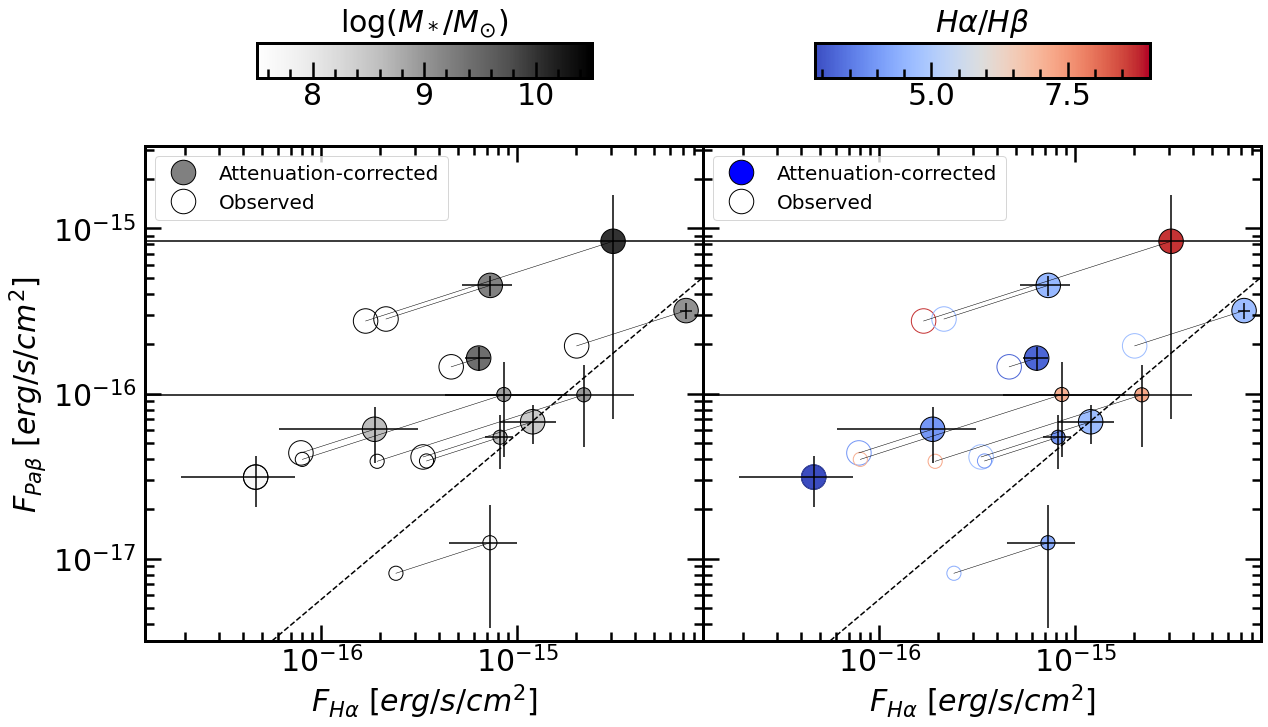

In [88]:
xha = np.linspace(10**-17 , 10**-14 , num = 10000)
yha = xha/17.6

fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$F_{Pa\beta}$ [$erg/s/cm^2$]")
ax0.set_xlabel(r"$F_{H\alpha}$ [$erg/s/cm^2$]")
y0 = ax0.scatter(dcmergedfsnr3['HA_FLUX_DC_BALMER'] , dcmergedfsnr3['PAB_FLUX_DC_BALMER']  , s = 600 , c = dcmergedfsnr3['td_lmass'], ec='black' , cmap= 'Greys', vmin=7.5, vmax=10.5)
ax0.scatter(dcmergedfsnr3['HA_FLUX'] , dcmergedfsnr3['PAB_FLUX'] , s=600, ec='black', fc='none')
ax0.errorbar(dcmergedfsnr3['HA_FLUX_DC_BALMER']  , dcmergedfsnr3['PAB_FLUX_DC_BALMER']  , xerr = dcmergedfsnr3['HA_FLUX_DC_BALMER_ERR']  , yerr = dcmergedfsnr3['PAB_FLUX_DC_BALMER_ERR']  ,c = 'black' , linestyle = 'None')
for i in range(len(dcmergedfsnr3)):
    ax0.plot([dcmergedfsnr3['HA_FLUX'].iloc[i] , dcmergedfsnr3['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedfsnr3['PAB_FLUX'].iloc[i] , dcmergedfsnr3['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
    
ax0.scatter(dcmergedfsnr3s['HA_FLUX_DC_BALMER'] , dcmergedfsnr3s['PAB_FLUX_DC_BALMER']  , s = 200 , c = dcmergedfsnr3s['td_lmass'], ec='black' , cmap= 'Greys', vmin=7.5, vmax=10.5)
ax0.scatter(dcmergedfsnr3s['HA_FLUX'] , dcmergedfsnr3s['PAB_FLUX'] , s=200, ec='black', fc='none')
ax0.errorbar(dcmergedfsnr3s['HA_FLUX_DC_BALMER']  , dcmergedfsnr3s['PAB_FLUX_DC_BALMER']  , xerr = dcmergedfsnr3s['HA_FLUX_DC_BALMER_ERR']  , yerr = dcmergedfsnr3s['PAB_FLUX_DC_BALMER_ERR']  ,c = 'black' , linestyle = 'None')
for i in range(len(dcmergedfsnr3s)):
    ax0.plot([dcmergedfsnr3s['HA_FLUX'].iloc[i] , dcmergedfsnr3s['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedfsnr3s['PAB_FLUX'].iloc[i] , dcmergedfsnr3s['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
ax0.plot(xha , yha , '--' ,  c = 'black')
ax0.axis([10**-16.9,10**-14.05,10**-17.5,10**-14.5])
ax0.set_yscale('log')
ax0.set_xscale('log')
legend_elements0 = [Line2D([0], [0], marker='o', color='none', label='Attenuation-corrected', markerfacecolor='grey', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='o', color='none', label='Observed', markerfacecolor='none', markeredgecolor='black', markersize=np.sqrt(600))]
ax0.legend(handles=legend_elements0, loc='upper left')

ax1 = fig.add_subplot(gs[2:12, 5:10])                                                                                      
y1 = ax1.scatter(dcmergedfsnr3['HA_FLUX_DC_BALMER'] , dcmergedfsnr3['PAB_FLUX_DC_BALMER']  , s = 600 , c = dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'], ec='black' , cmap= 'coolwarm', vmin=2.86, vmax=9)
ax1.scatter(dcmergedfsnr3['HA_FLUX'], dcmergedfsnr3['PAB_FLUX'], s=600, c = dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'], fc='none', cmap='coolwarm', vmin=2.86, vmax=9)
ax1.errorbar(dcmergedfsnr3['HA_FLUX_DC_BALMER'] , dcmergedfsnr3['PAB_FLUX_DC_BALMER'] , xerr = dcmergedfsnr3['HA_FLUX_DC_BALMER_ERR'] , yerr = dcmergedfsnr3['PAB_FLUX_DC_BALMER_ERR'] ,c = 'black' , linestyle = 'None')
for i in range(len(dcmergedfsnr3)):
    ax1.plot([dcmergedfsnr3['HA_FLUX'].iloc[i] , dcmergedfsnr3['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedfsnr3['PAB_FLUX'].iloc[i] , dcmergedfsnr3['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
    
ax1.scatter(dcmergedfsnr3s['HA_FLUX_DC_BALMER'] , dcmergedfsnr3s['PAB_FLUX_DC_BALMER']  , s = 200 , c = dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'], ec='black' , cmap= 'coolwarm', vmin=2.86, vmax=9)
ax1.scatter(dcmergedfsnr3s['HA_FLUX'], dcmergedfsnr3s['PAB_FLUX'], s=200, c = dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'], fc='none', cmap='coolwarm', vmin=2.86, vmax=9)
ax1.errorbar(dcmergedfsnr3s['HA_FLUX_DC_BALMER'] , dcmergedfsnr3s['PAB_FLUX_DC_BALMER'] , xerr = dcmergedfsnr3s['HA_FLUX_DC_BALMER_ERR'] , yerr = dcmergedfsnr3s['PAB_FLUX_DC_BALMER_ERR'] ,c = 'black' , linestyle = 'None')
for i in range(len(dcmergedfsnr3s)):
    ax1.plot([dcmergedfsnr3s['HA_FLUX'].iloc[i] , dcmergedfsnr3s['HA_FLUX_DC_BALMER'].iloc[i]] , [dcmergedfsnr3s['PAB_FLUX'].iloc[i] , dcmergedfsnr3s['PAB_FLUX_DC_BALMER'].iloc[i]] , c = 'black' , linewidth = .5)
    
ax1.plot(xha , yha , '--' ,  c = 'black')
ax1.axis([10**-16.9,10**-14.05,10**-17.5,10**-14.5])
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(labelleft = False)
ax1.set_xlabel(r"$F_{H\alpha}$ [$erg/s/cm^2$]")
legend_elements1 = [Line2D([0], [0], marker='o', color='none', label='Attenuation-corrected', markerfacecolor='blue', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='o', color='none', label='Observed', markerfacecolor='none', markeredgecolor='black', markersize=np.sqrt(600))]
ax1.legend(handles=legend_elements1, loc='upper left')


ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')

plt.show()

In [224]:
print(np.mean(dcmergedf['PABHA_EXCESS_DC_BALMER']))
print(np.median(dcmergedf['PABHA_EXCESS_DC_BALMER']))

0.35370196143850824
0.3123510379414682


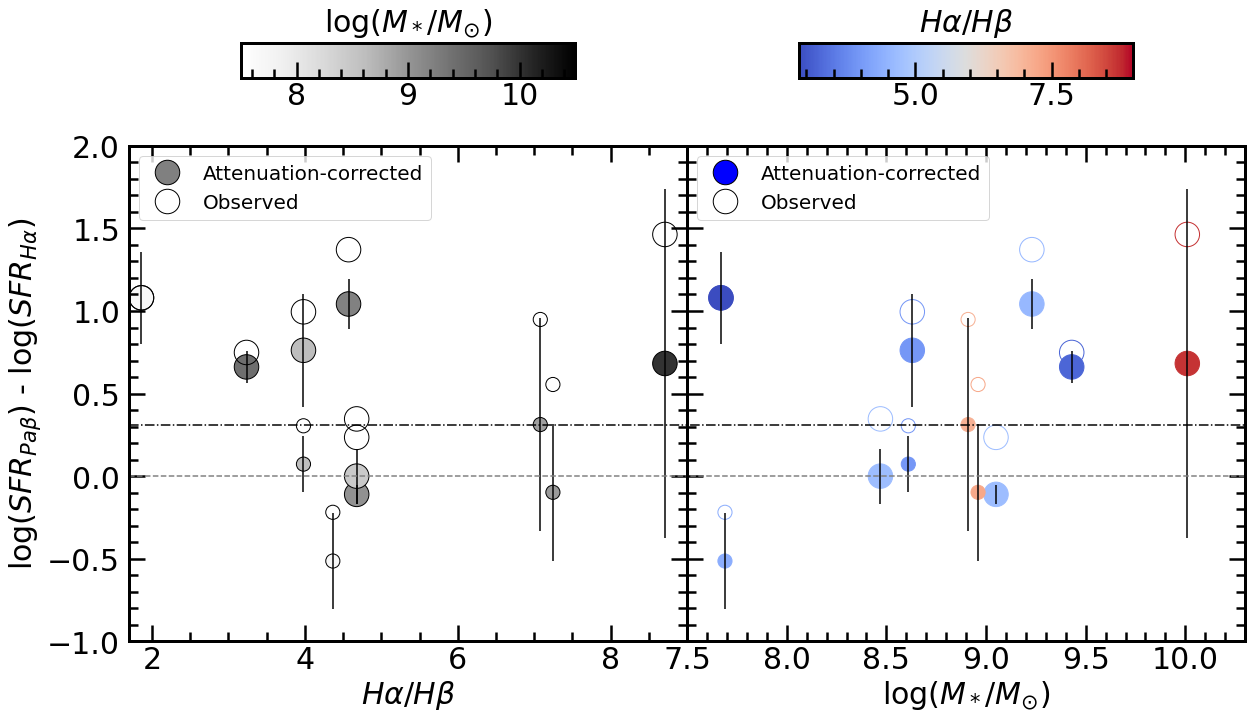

In [86]:
fig = plt.figure(figsize = (30 , 11))
gs = GridSpec(nrows=12, ncols=15)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5]) 
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{H\alpha}$)')
ax0.set_xlabel(r"$H\alpha/H\beta$")
y0 = ax0.scatter(dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX']  , dcmergedfsnr3['PABHA_EXCESS_DC_BALMER']  , s = 600 , c = dcmergedfsnr3['td_lmass'], ec='black' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax0.scatter(dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'] , dcmergedfsnr3['PABHA_EXCESS']  , s = 600 , ec='black', fc='none' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax0.errorbar(dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'] , dcmergedfsnr3['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedfsnr3['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')

ax0.scatter(dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX']  , dcmergedfsnr3s['PABHA_EXCESS_DC_BALMER']  , s = 200 , c = dcmergedfsnr3s['td_lmass'], ec='black' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax0.scatter(dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'] , dcmergedfsnr3s['PABHA_EXCESS']  , s = 200 , ec='black', fc='none' , cmap = 'Greys', vmin=7.5, vmax=10.5)
ax0.errorbar(dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'] , dcmergedfsnr3s['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedfsnr3s['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
ax0.plot([1.7 , 9] , [0.31 , 0.31] , '-.' , c = 'black')
ax0.plot([1.7 , 9] , [0 , 0] , '--' , c = 'gray')
ax0.axis([1.7 , 9 , -1 , 2])
legend_elements0 = [Line2D([0], [0], marker='o', color='none', label='Attenuation-corrected', markerfacecolor='grey', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='o', color='none', label='Observed', markerfacecolor='none', markeredgecolor='black', markersize=np.sqrt(600))]
ax0.legend(handles=legend_elements0, loc='upper left')


ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel('$\log(M_*/M_{\odot})$')
y1 = ax1.scatter(dcmergedfsnr3['td_lmass'] , dcmergedfsnr3['PABHA_EXCESS_DC_BALMER']  , s = 600 , c = dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'] , cmap = 'coolwarm', vmin=2.86, vmax=9)
ax1.errorbar(dcmergedfsnr3['td_lmass'] , dcmergedfsnr3['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedfsnr3['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
ax1.scatter(dcmergedfsnr3['td_lmass'] , dcmergedfsnr3['PABHA_EXCESS']  , s = 600 , c = dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'], fc='none' , cmap = 'coolwarm', vmin=2.86, vmax=9)
ax1.scatter(dcmergedfsnr3s['td_lmass'] , dcmergedfsnr3s['PABHA_EXCESS_DC_BALMER']  , s = 200 , c = dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'] , cmap = 'coolwarm', vmin=2.86, vmax=9)
ax1.errorbar(dcmergedfsnr3s['td_lmass'] , dcmergedfsnr3s['PABHA_EXCESS_DC_BALMER']  , yerr = dcmergedfsnr3s['PABHA_EXCESS_DC_BALMER_ERR'], c = 'black' , linestyle = 'None')
ax1.scatter(dcmergedfsnr3s['td_lmass'] , dcmergedfsnr3s['PABHA_EXCESS']  , s = 200 , c = dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'], fc='none' , cmap = 'coolwarm', vmin=2.86, vmax=9)
ax1.plot([6 , 11] , [0.31 , 0.31] , '-.' , c = 'black')
ax1.plot([7 , 10.5] , [0 , 0] , '--' , c = 'gray')
ax1.axis([7.5 , 10.3 , -1 , 2])
ax1.tick_params(labelleft = False)
legend_elements1 = [Line2D([0], [0], marker='o', color='None', label='Attenuation-corrected', markerfacecolor='blue', markersize=np.sqrt(600)),
                    Line2D([0], [0], marker='o', color='none', label='Observed', markerfacecolor='none', markeredgecolor='black', markersize=np.sqrt(600))]
ax1.legend(handles=legend_elements1, loc='upper left')


                                                                                  

ax4 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$\log(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')
ax3 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')

plt.show()

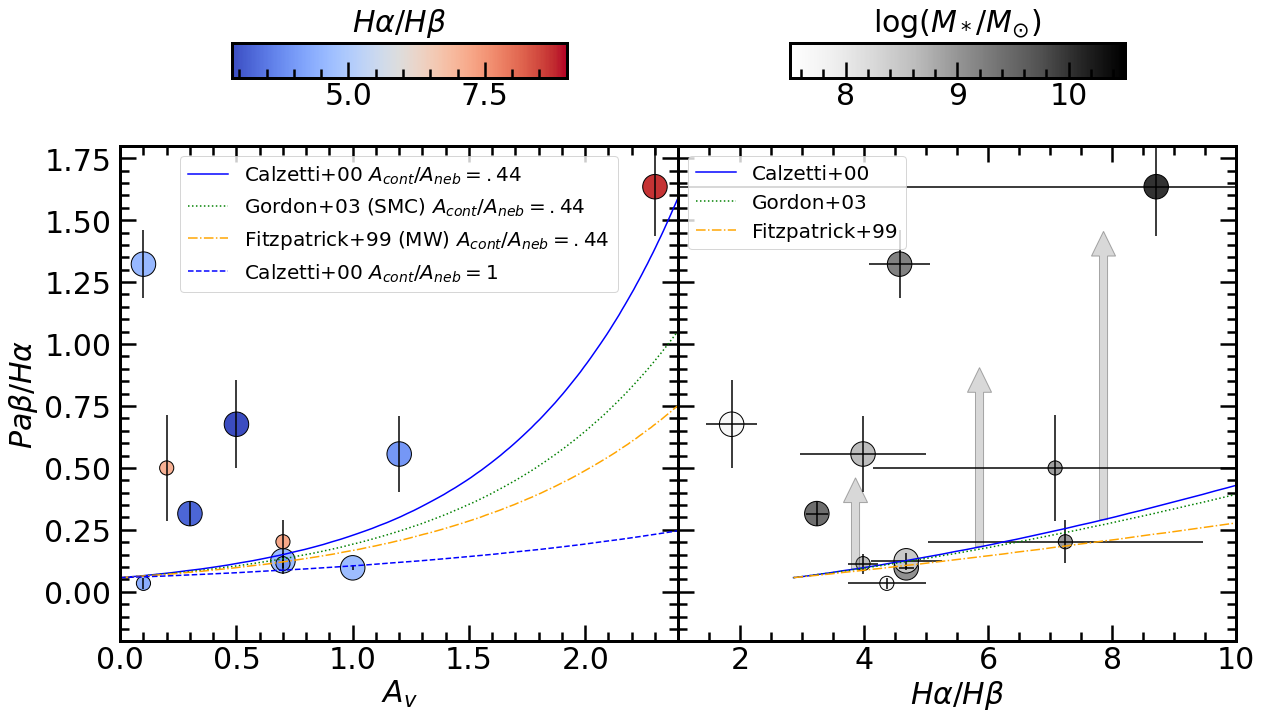

In [22]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$A_v$")
y0 = ax0.scatter(dcmergedfsnr3['td_Av'], dcmergedfsnr3['PAB_FLUX']/dcmergedfsnr3['HA_FLUX'], s=600, c = dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'], ec='black', cmap='coolwarm', vmin=2.86, vmax=9)
ax0.errorbar(dcmergedfsnr3['td_Av'] ,  dcmergedfsnr3['PAB_FLUX']/dcmergedfsnr3['HA_FLUX']  , yerr = dcmergedfsnr3['PABHA_ERR'], c = 'black' , linestyle = 'None')

ax0.scatter(dcmergedfsnr3s['td_Av'], dcmergedfsnr3s['PAB_FLUX']/dcmergedfsnr3s['HA_FLUX'], s=200, c = dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'], ec='black', cmap='coolwarm', vmin=2.86, vmax=9)
ax0.errorbar(dcmergedfsnr3s['td_Av'] ,  dcmergedfsnr3s['PAB_FLUX']/dcmergedfsnr3s['HA_FLUX']  , yerr = dcmergedfsnr3s['PABHA_ERR'], c = 'black' , linestyle = 'None')

ax0.plot(dustcurvesdf['AV_CALZ00']*.44 , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = r'Calzetti+00 $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_GORD03']*.44 , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = ':' , label = r'Gordon+03 (SMC) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_FITZ99']*.44 , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = '-.' , label = r'Fitzpatrick+99 (MW) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_CALZ00'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , linestyle = '--' , label = r'Calzetti+00 $A_{cont}/A_{neb} = 1$')
ax0.legend(loc = 9)  
ax0.axis([0 , 2.4 , -.2 , 1.8])

ax1 = fig.add_subplot(gs[2:12, 5:10])
ax1.set_xlabel(r"$H\alpha/H\beta$")
y1 = ax1.scatter(dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'], dcmergedfsnr3['PAB_FLUX']/dcmergedfsnr3['HA_FLUX'], s=600, c = dcmergedfsnr3['td_lmass'], ec='black', cmap='Greys', vmin=7.5, vmax=10.5)
ax1.errorbar(dcmergedfsnr3['HA_FLUX']/dcmergedfsnr3['HB_FLUX'] ,  dcmergedfsnr3['PAB_FLUX']/dcmergedfsnr3['HA_FLUX']  , xerr = dcmergedfsnr3['BALMER_ERR'] , yerr = dcmergedfsnr3['PABHA_ERR'], c = 'black' , linestyle = 'None')
ax1.scatter(dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'], dcmergedfsnr3s['PAB_FLUX']/dcmergedfsnr3s['HA_FLUX'], s=200, c = dcmergedfsnr3s['td_lmass'], ec='black', cmap='Greys', vmin=7.5, vmax=10.5)
ax1.errorbar(dcmergedfsnr3s['HA_FLUX']/dcmergedfsnr3s['HB_FLUX'] ,  dcmergedfsnr3s['PAB_FLUX']/dcmergedfsnr3s['HA_FLUX']  , xerr = dcmergedfsnr3s['BALMER_ERR'] , yerr = dcmergedfsnr3s['PABHA_ERR'], c = 'black' , linestyle = 'None')
ax1.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = 'Calzetti+00')
ax1.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = ':' , label = 'Gordon+03')
ax1.plot(dustcurvesdf['HAHB'] , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = '-.' , label = 'Fitzpatrick+99')
ax1.arrow(dustcurvesdf['HAHB'][5] , dustcurvesdf['PABHA_CALZ00'][5] , 0 , 4*dustcurvesdf['PABHA_CALZ00'][5] , width = .13 , head_length = .1 ,length_includes_head = True , fc = 'gray' , ec = 'black', alpha=.3)
ax1.arrow(dustcurvesdf['HAHB'][15] , dustcurvesdf['PABHA_CALZ00'][15] , 0 , 4*dustcurvesdf['PABHA_CALZ00'][15] , width = .13 , head_length = .1 ,length_includes_head = True , fc = 'gray' , ec = 'black', alpha=.3)
ax1.arrow(dustcurvesdf['HAHB'][25] , dustcurvesdf['PABHA_CALZ00'][25] , 0 , 4*dustcurvesdf['PABHA_CALZ00'][25] , width = .13 , head_length = .1 ,length_includes_head = True , fc = 'gray' , ec = 'black', alpha=.3)
ax1.axis([1 , 10 , -.2 , 1.8])
ax1.legend(loc = 'upper left')
ax1.tick_params(labelleft = False)



ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')
ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = 'log$(M_*/M_{\odot})$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')


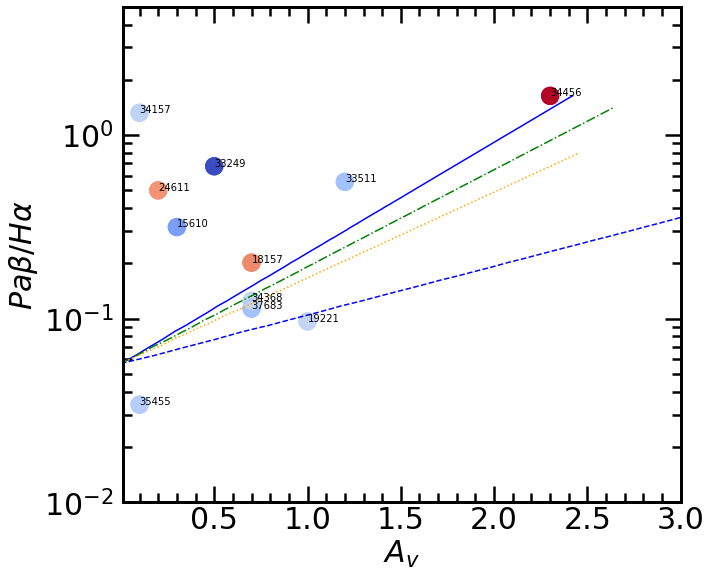

In [11]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
ax0.set_ylabel(r"$Pa\beta/H\alpha$")
ax0.set_xlabel(r"$A_v$")
y0 = ax0.scatter(dcmergedf['td_Av'], dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX'], s=300, c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'], cmap='coolwarm')
#ax0.errorbar(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , yerr = dcmergedf['PABHA_ERR'], c = 'black' , linestyle = 'None')
for i in range(len(dcmergedf)):
    ax0.annotate(str(dcmergedf['ID'].iloc[i]) , xy = (dcmergedf['td_Av'].iloc[i], dcmergedf['PAB_FLUX'].iloc[i]/dcmergedf['HA_FLUX'].iloc[i]) , size = 10)
scatterdots0 = ax0.scatter(dcmergedf['td_Av'] ,  dcmergedf['PAB_FLUX']/dcmergedf['HA_FLUX']  , s = 300 , c = dcmergedf['HA_FLUX']/dcmergedf['HB_FLUX'] , cmap = 'coolwarm')
ax0.plot(dustcurvesdf['AV_CALZ00']*.44 , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , label = r'Calzetti+00 $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_GORD03']*.44 , dustcurvesdf['PABHA_GORD03'] , c = 'green' , linestyle = '-.' , label = r'Gordon+03 (SMC) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_FITZ99']*.44 , dustcurvesdf['PABHA_FITZ99'] , c = 'orange' , linestyle = ':' , label = r'Fitzpatrick+99 (MW) $A_{cont}/A_{neb} = .44$')
ax0.plot(dustcurvesdf['AV_CALZ00'] , dustcurvesdf['PABHA_CALZ00'] , c = 'blue' , linestyle = '--' , label = r'Calzetti+00 $A_{cont}/A_{neb} = 1$')
scatterdots0.set_facecolor('none')
# ax0.set_xscale('log')
ax0.set_yscale('log')
# for i in range(0, len(lmpabhaav.chain), 25):
#     xs = np.arange(0,4)
#     ys = lmpabhaav.chain[i]['alpha'] + xs * lmpabhaav.chain[i]['beta']
#     ax0.plot(xs, ys, color='gray', alpha=0.03)
# ax0.plot([0 , 4] , [np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*0 , np.mean(lmpabhaav.chain['alpha']) + np.mean(lmpabhaav.chain['beta'])*4] , c = 'black' , label = 'm = ' + str(round(np.mean(lmpabhaav.chain['beta']) , 2)) + r'$\pm$' + str(round(np.std(lmpabhaav.chain['beta']), 2))  )
#ax0.legend(loc = 9)  
ax0.axis([0.01 , 3 , .01 , 5])



# ax3 = fig.add_subplot(gs[0:1,1:4])
# fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$H\alpha/H\beta$')
# ax3.xaxis.set_label_position('top')
plt.show()